In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# 1 Var.
x = np.array([0.25, 0.31, 0.36, 0.39, 0.43, 0.47, 0.52, 0.56, 0.64, 0.66, 0.71])
y = np.array([0.778, 0.758, 0.717, 0.677, 0.650, 0.625, 0.644, 0.661, 0.717, 0.724, 0.741])

np.printoptions(precision = 9)

def s(j): return np.power(x, j).sum()

def b(j): return (np.power(x, j) * y).sum()

In [3]:
A2 = np.matrix([[s(0), s(1), s(2)],
                [s(1), s(2), s(3)],
                [s(2), s(3), s(4)]])
B2 = np.matrix([b(0), b(1), b(2)]).T

a2 = np.linalg.solve(A2, B2)

In [4]:
def p2(t):
    """Возвращает значение многочлена 2-й степени"""
    t_c = np.copy(t)
    for x in np.nditer(t_c, op_flags=['readwrite']):
        x[...] =  (np.power(x, [0, 1, 2]) * np.asarray(a2.T)).sum()
    return t_c

In [5]:
A3 = np.matrix([[s(0), s(1), s(2), s(3)],
                [s(1), s(2), s(3), s(4)],
                [s(2), s(3), s(4), s(5)],
                [s(3), s(4), s(5), s(6)]])
B3 = np.matrix([b(0), b(1), b(2), b(3)]).T

a3 = np.linalg.solve(A3, B3)

In [6]:
def p3(t):
    """Возвращает значение многочлена 3-й степени"""
    t_c = np.copy(t)
    for x in np.nditer(t_c, op_flags=['readwrite']):
        x[...] =  (np.power(x, [0, 1, 2, 3]) * np.asarray(a3.T)).sum()
    return t_c

In [7]:
A4 = np.matrix([[s(0), s(1), s(2), s(3), s(4)],
                [s(1), s(2), s(3), s(4), s(5)],
                [s(2), s(3), s(4), s(5), s(6)],
                [s(3), s(4), s(5), s(6), s(7)],
                [s(4), s(5), s(6), s(7), s(8)]])
B4 = np.matrix([b(0), b(1), b(2), b(3), b(4)]).T

a4 = np.linalg.solve(A4, B4)

In [8]:
def p4(t):
    """Возвращает значение многочлена 4-й степени"""
    t_c = np.copy(t)
    for x in np.nditer(t_c, op_flags=['readwrite']):
        x[...] =  (np.power(x, [0, 1, 2, 3, 4]) * np.asarray(a4.T)).sum()
    return t_c

In [9]:
%%latex
Инициализация полиномов 5-8 степеней:

<IPython.core.display.Latex object>

In [10]:
p5 = np.poly1d(np.polyfit(x, y, 5))
p6 = np.poly1d(np.polyfit(x, y, 6))
p7 = np.poly1d(np.polyfit(x, y, 7))
p8 = np.poly1d(np.polyfit(x, y, 8))
p8 = np.poly1d(np.polyfit(x, y, 8))

In [11]:
%%latex
Абсолютные погрешности:

<IPython.core.display.Latex object>

In [12]:
ar2 = np.abs(y - p2(x))
ar3 = np.abs(y - p3(x))
ar4 = np.abs(y - p4(x))
ar5 = np.abs(y - p5(x))
ar6 = np.abs(y - p6(x))
ar7 = np.abs(y - p7(x))
ar8 = np.abs(y - p8(x))
print(f'ar2 = {np.max(ar2)}')
print(f'ar3 = {np.max(ar3)}')
print(f'ar4 = {np.max(ar4)}')
print(f'ar5 = {np.max(ar5)}')
print(f'ar6 = {np.max(ar6)}')
print(f'ar7 = {np.max(ar7)}')
print(f'ar8 = {np.max(ar8)}')

ar2 = 0.026374609658501802
ar3 = 0.026364190638658025
ar4 = 0.009069000756746881
ar5 = 0.0081051276874482
ar6 = 0.005318857121352383
ar7 = 0.0047352593761808
ar8 = 0.0054119864651284155


In [13]:
%%latex
Среднеквадратичная погрешность:

<IPython.core.display.Latex object>

In [14]:
sr2 = np.sqrt(np.power(ar2, 2).sum()) / (len(x) + 1)
sr3 = np.sqrt(np.power(ar3, 2).sum()) / (len(x) + 1)
sr4 = np.sqrt(np.power(ar4, 2).sum()) / (len(x) + 1)
sr5 = np.sqrt(np.power(ar5, 2).sum()) / (len(x) + 1)
sr6 = np.sqrt(np.power(ar6, 2).sum()) / (len(x) + 1)
sr7 = np.sqrt(np.power(ar7, 2).sum()) / (len(x) + 1)
sr8 = np.sqrt(np.power(ar8, 2).sum()) / (len(x) + 1)
print(f'sr2 = {sr2}')
print(f'sr3 = {sr3}')
print(f'sr4 = {sr4}')
print(f'sr5 = {sr5}')
print(f'sr6 = {sr6}')
print(f'sr7 = {sr7}')
print(f'sr8 = {sr8}')

sr2 = 0.004582507384690488
sr3 = 0.004568833562448923
sr4 = 0.0013740585278683444
sr5 = 0.0010926767946691153
sr6 = 0.0008591752675141255
sr7 = 0.000818929383918797
sr8 = 0.0007935837701098417


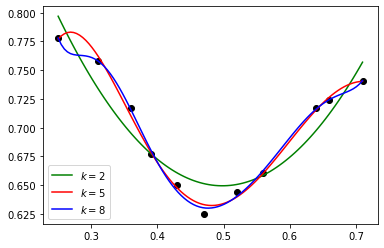

In [15]:
points = np.linspace(x[0], x[-1], 100)
plt.plot(points, p2(points), color = 'green', label = r'$k = 2$')
plt.plot(points, p5(points), color = 'red', label = r'$k = 5$')
plt.plot(points, p8(points), label = r'$k = 8$', color = 'blue')
plt.scatter(x, y, color = 'black')
plt.legend()